# Detección de tendencias en series autocorrelacionadas
## Introducción
Este ejemplo trata de demostrar la importancia de la autocorrelación para la evaluación de tendencias. Hay que dejar claro cuál es la hipótesis nula del contraste, y valorar con cuidado si es o no realista. ¡Rechazar una hipótesis ya de por sí poco plausible a tenor de los datos que se analizan no tiene valor!
## Idea del contraste
La idea que subyace es que cualquier serie, por pura aleatoriedad, siempre va a tener algo de tendencia. La cuestión es si esa tendencia es compatible con lo que podríamos esperar por pura aleatoriedad. Para ello define algún estadístico, se le aplica a los datos, y luego se construye la distribución de ese estadístico bajo la hipótesis de que los datos no tuvieran tendencia.

La clave aquí es que hay que construir la distribución del estadístico, y eso está basado en un conjunto de hipótesis. La usencia de tendencia es una de allas, pero no la única. Normalmente se asume también que los datos son independientes. De ahí sale la distribución *t* que se suele usar en los contrastes habituales. 

Pero ¿Qué pasa si los datos tienen autocorrelación? Pues en ese caso la distribución es más ancha (es más probable enccontrar tendencias relativamente altas incluso en series que, por construcción, carecen de tendencia). Vamos a demostrarlo mediante simulaciones Montecarlo.
## Modelo autoregresivo
Para generar series con autocorrelación sintética usaré un modelo autoregresivo, que se define como 

$X_t=\rho X_{t-1}+\epsilon$

Donde $\epsilon$ es ruido blanco, i.e. $\epsilon\sim N(0,1)$. Esta serie tiene autocorrelación (a lag 1) $\rho$. Hay modelos más sofisticados, éste es el más simple, pero sirve para ver el efecto.

Compararé el resultado de las tendencias generadas con este modelo, con el modelo de ruido blanco


$Y_t=\epsilon$

Se realizan 3000 simulaciones, se calcula la tendencia (que es una variable aleatoria) y se comparan las distribuciones obtenidas en los dos casos.

## Programa

In [28]:
# Creamos los deslizadores con los dos parámetros a dejar libres: 
# longitud de la serie y correlacion
import ipywidgets as widgets
from IPython.display import display
cor = widgets.FloatSlider(min=0, max=1.0, step=0.1,description='Cor:')
length = widgets.IntSlider(min=10, max=100, step=10,description='Longitud:')

FloatSlider(value=0.3, description='Cor:', max=1.0)

IntSlider(value=70, description='Longitud:', min=10, step=10)

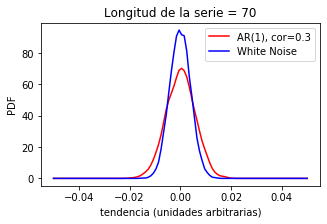

In [33]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats

# Parámetros
Nexp = 5000
size = length.value
rho=cor.value

# Definimos variables necesarias pero poco relevantes
x = np.linspace(0,100,size)
t1 = np.zeros(Nexp)
t2 = np.zeros(Nexp)

# Bucle en simulaciones que guarda los resultados en t1 y t2
for i in range(Nexp):
    y1 = sm.tsa.arma_generate_sample(np.array([1, -rho]), np.array([1, 0]), size)
    y2 = sm.tsa.arma_generate_sample(np.array([1, 0]), np.array([1, 0]), size)

    test1 = stats.linregress(x,y1)
    test2 = stats.linregress(x,y2)
    t1[i]=test1.slope
    t2[i]=test2.slope
    
# Obtenemos las PDFs para pintar  
kde1 = stats.gaussian_kde(t1)
kde2 = stats.gaussian_kde(t2)
x=np.linspace(-.05,0.05,100)
y1 = kde1.evaluate(x)
y2 = kde2.evaluate(x)

# Pintamos las dos PDFs, guardadas en (x,y1) y (x,y2)
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(5,3), )
fig.patch.set_facecolor('white')
plt.title("Longitud de la serie = %d" %(size))
plt.xlabel("tendencia (unidades arbitrarias)")
plt.ylabel("PDF")
plt.plot(x, y1, 'r', x, y2, 'b')
plt.legend(('AR(1), cor=%.1f' %(rho),'White Noise'))

# Mostramos los deslizadores cerca del resultado
display(cor)
display(length)
